# Matlab Best Practices

Wie so oft gibt es viele Wege die zum Ziel führen, so ist es auch bei der Programmierung. Hier sollen einige Programmierrichtlinien aufgelistet werden, die sich bewährt haben. Die meisten davon lassen sich allgemein auf alle Programmiersprachen anwenden, einige wenige sind Matlab-spezifisch.

## Unkommentierter bzw. nicht-dokumentierter Code ist schlechter Code

Wenn Sie ein Matlab- bzw. Octaveskript schreiben, haben Sie in der Regel eine genaue Vorstellung von dem was ihr Skript macht und brauchen die Kommentare nicht als Verständnisstütze. Aus dem Grund ist es allzu leicht auf die mühsame Kommentierung zu verzichten. Die Erfahrung zeigt aber, das schon nachdem sie sich wenige Wochen nicht mehr mit dem Code auseinandergesetzt haben ihre Gedankengänge bei der Programmierung vergessen haben. Stellen Sie sich vor, nach drei Wochen stellt sich heraus, dass sich ein Bug eingeschlichen hat. Bei der Fehlersuche müssen sie sich mühsam durch ihren alten Code kämpfen und es ist im Nachhinein plötzlich nicht mehr ganz so einfach nachzuvollziehen, was Sie sich eigentlich dabei gedacht hatten. Spätestens in solchen Momenten fällt auf wie wichtig Kommentierung ist. 

Zur Kommentierung gehört nicht nur dazu, dass Sie beschreiben WAS der Code macht, sondern WARUM er so aussieht wie er aussieht. Am Anfang eines Skriptes sollte eine kurze Beschreibung aufzufinden sein, welchen Zweck das Programm dient. Am Anfang einer Funktion gilt dasselbe, wobei hier auch Beschreibungen der Ein- und Ausgabegrößen dazugehören. Wenn relevant, sollten hier auch physikalische Einheiten benannt werden!

In [9]:
%%file spherical2Cartesian.m
function p = spherical2Cartesian(longitude, latitude, elevation)
% This function takes spherical coordinates and transforms them to
% cartesian coordinates
%
% Inputs:
%    longitude: azimuth angle in degrees measured from xz-plane
%    latitude:  polar angle in degrees  measured from xy-plane
%    elevation: radial distance from origin (unit implied)
%
% Outputs:
%    p: cartesian point (unit as input)

p = [elevation*sind(longitude)*cosd(latitude); ...
     elevation*sind(longitude)*sind(latitude); ...
     elevation*cosd(longitude) ];

end

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/spherical2Cartesian.m'.


In [14]:
%%file sphericalGrid.m
% This script creates a regular grid on a sphere using spherical 
% coordinates in a 10-degree resolution and displays the points 
% in a 3D-plot

% first, preallocate (n,3)-Matrix to store the cartesian points
numPoints = numel(-180:10:180)*numel(-90:10:90);
p = zeros(numPoints, 3);

% fill the array of points using the spherical2Cartesian function
p_index = 1;
for long = -180:5:180
    for lat = -90:5:90
        p(p_index,:) = spherical2Cartesian(long, lat, 1);
        p_index = p_index + 1;
    end
end

% plot the result
scatter3(p(:,1), p(:,2), p(:,3), 'o');
axis equal;


Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/sphericalGrid.m'.


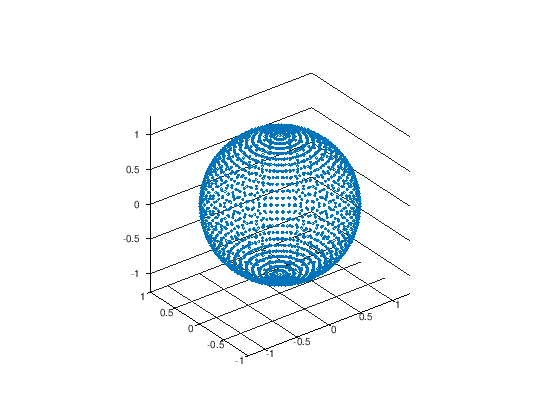

In [15]:
run sphericalGrid

Gerade im Beruf ist es sehr unwahrscheinlich, dass Sie alleine an einem Code arbeiten. Sobald mehrere Leute ihren Code verwenden ist es klar, dass Sie ihren Kollegen oder Kunden das Leben erleichtern, in dem Sie klar kommentierten bzw. dokumentierten Code abliefern. Ein Code, der nicht verstanden wird, wird sehr schnell - berechtigterweise - als schlechter Code abgestempelt, auch wenn er äußerst clever programmiert wurde.

Spätestens wenn das Programm von einer größeren Zielgruppe benutzt werden soll, reicht eine reine Kommentierung nicht aus. Hier muss eine html- oder pdf-Dokumentation herhalten. Die Wichtigkeit von guter Dokumentation für die Verbreitung von Software ist unfassbar wichtig! Es gibt inzwischen einige Hilfsprogramme, die aus strukturierter Code-Kommentierung automatisiert eine solche Dokumentation erzeugen kann, Doxygen und Sphinx sind Beispiele. [Hier](https://www.artefact.tk/software/matlab/m2html/) finden Sie ein Tool das spezifisch für Matlab entwickelt wurde.

Die Sprache der Kommentierung sollte sich natürlich an die Zielgruppe richten. Da sich die Zielgruppe häufig während der Lebenszeit eines Programmes ändert, bietet es sich an von Anfang an eine Sprache zu nehmen, die von sehr vielen Menschen verstanden wird. Wie oft habe ich schon eine Bibliothek nicht benutzt, nur weil die Dokumentation auf Französisch ist.

## Sprechende Variablennamen

Damit ein Code verständlich ist, hilft es sprechende Variablen- und Funktionsnamen zu verwenden. Während man in mathematischen Gleichungen gerne Buchstaben und Symbole als Abkürzungen verwendet, sollte man im Code versuchen die Bedeutung einer Variable durch ihren Namen auszudrücken. Im obigen Beispiel wurden die Variablennamen `longitude`, `latitude` und `elevation` benutzt um auf die Bedeutung hinzuweisen, anstatt der üblichen Bezeichnungen `theta`, `phi` und `r` für $(\Theta, \phi, r)$.

Der folgende Code entspricht syntaktisch und semantisch dem obigen Beispiel, ist aber vollkommen unverständlich:

In [22]:
%%file xralkldaf.m
function peng = xralkldaf(xyz, pft, hurz)
peng = [hurz*sind(xyz)*cosd(pft);hurz*sind(xyz)*sind(pft);hurz*cosd(xyz)];
end

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/xralkldaf.m'.


In [25]:
%%file rxlquapoeh.m
kkkk=numel(-180:10:180)*numel(-90:10:90);qwerty=zeros(kkkk, 3);
c=1;
for b=-180:5:180
    for a=-90:5:90
        qwerty(c,:)=xralkldaf(b, a, 1);c=c+1;
    end
end
scatter3(qwerty(:,1),qwerty(:,2),qwerty(:,3),'o');axis equal;


Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/rxlquapoeh.m'.


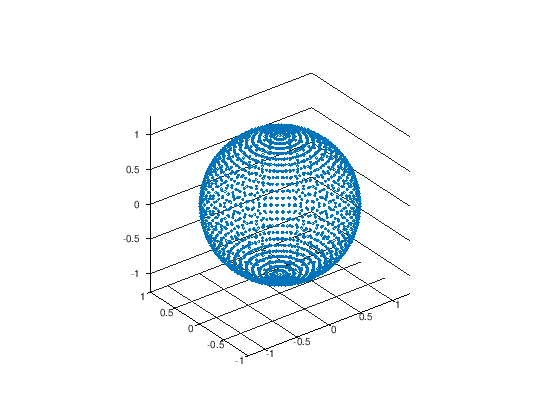

In [24]:
run rxlquapoeh

## Wiederholten Code vermeiden

To Do: Beispiel: quadratische Gleichung mit pq-Formel lösen. Gleichung zum Lösen in Funktion auslagern.


## Das Rad nicht neu erfinden

To Do

## Lange Skripte und Funktionen vermeiden

To Do

## Funktionen über Skripte bevorzugen

Zwei Gründe kennen wir nun schon, warum Funktionen nützlich sind: Zum einen lassen sich Wiederholungen dadurch vermeiden, dass oft vorkommende Aufgaben in eine Funktion ausgelagert werden. Zum anderen helfen Sie den Code in kleine Arbeitspakete zu zerlegen. 

Es gibt aber weitere Gründe, warum Funktionen häufig gegenüber Skripten zu bevorzugen sind.  

To Do (Beispiel Fehlerquelle scope?)

## Globale Variablen vermeiden

To Do (nur kurz begründen)

## Performance: Allokation

To Do: Große Datenmengen nicht dynamischen allokieren.

## Performance: Matlab Vektorisierung ausnutzen

To Do (Beispiel, kurze Erklärung von SIMD)

## Kein übermäßiger Gebrauch von if-then-else Anweisungen

To Do

## Gleitkommazahlen nicht auf Gleichheit überprüfen

To Do

## Versionskontrolle verwenden

To Do, hier nur erwähnen was es ist und Links zur Verfügung stellen.